In [2]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import shap
from collections import Counter

## Data Preprocessing

In [3]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/BHT1_merged.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/BHT2_merged.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/BHT3_merged.csv"

BHT_1 = pd.read_csv(path_1, sep=',')
BHT_2 = pd.read_csv(path_2, sep=',')
BHT_3 = pd.read_csv(path_3, sep=',')


In [4]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Train test split function

### Search Space / Param Grid 

In [5]:
from hyperopt import *
search_space = {
    'fit_intercept': hp.choice('fit_intercept', [True]),
    'solver': hp.choice('solver', ['liblinear', 'lbfgs']),
    'C': hp.uniform('C', 0.002, 0.01),
    'penalty': hp.choice('penalty', ['l2']),
    'class_weight':'balanced',
}

## BHT semester 1

In [68]:
hpo = ModelTrainer(random_state=42)

# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(BHT_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
x, y = hpo.split_data(BHT_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 280 | 0: 59


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 37.10trial/s, best loss: -0.5372222222222222]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            09               03
	 actual 1            11               45

Model parameters:
{'C': 0.004050687841091654, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Balanced acc.: 77.67857%
Validation accuracy.: 79.41176%
Sensitivity score (for 1): 80.35714%
Specificity score (for 0): 75.00000%
F1 score.: 86.53846%
False prediction: 20.58824%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 69.79trial/s, best loss: -0.59828

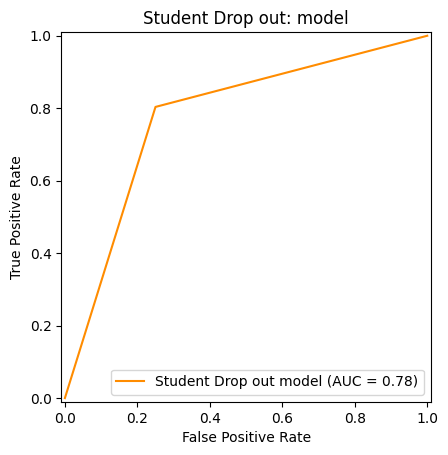

In [69]:
hpo = ModelTrainer(random_state=42)
model, feature_importance = hpo.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='lr'
    )

In [70]:
feature_importance

,variable,coefficient
3,M04_1_N,0.075360
4,M05_1_N,0.069720
0,M01_1_N,0.053980
1,M02_1_N,0.033990
5,M06_1_N,0.030890
2,M03_1_N,-0.000130


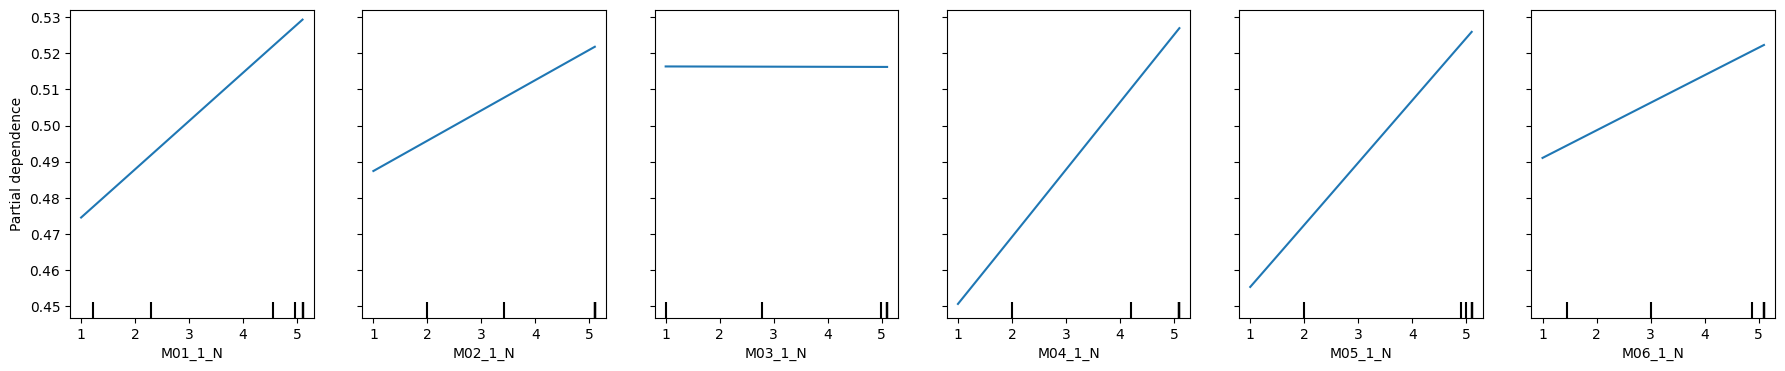

In [71]:
hpo.plot_partial_dependence(model=model, n_jobs=5, n_cols=6, size=1)

#### Shap analysis

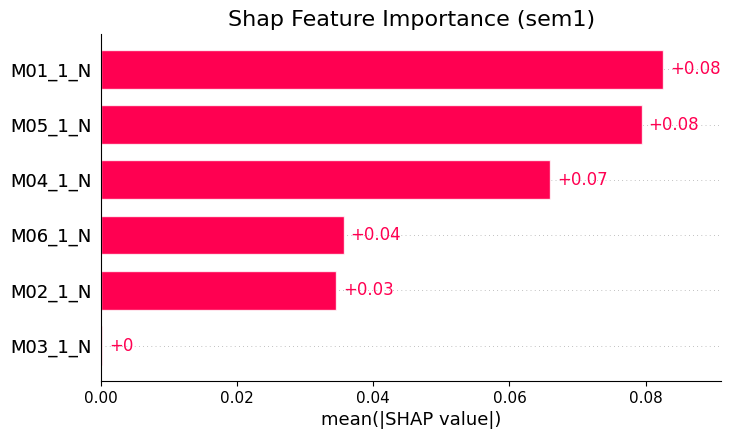

In [72]:
## Shap Global explainations
import shap
explainer = shap.Explainer(model['model'], model['x_train'])
shap_values = explainer(model['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values)

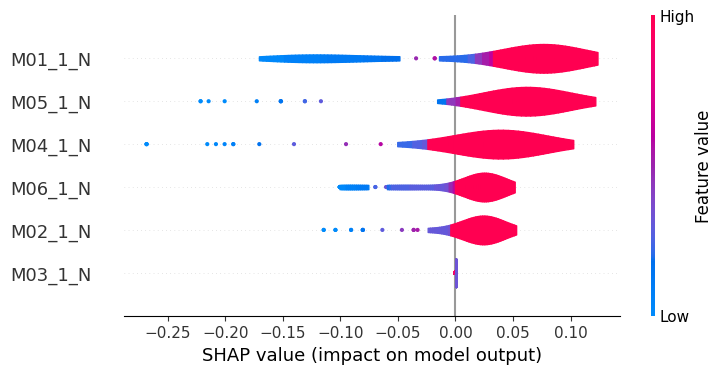

In [73]:
shap.plots.violin(shap_values, show=True)

In [74]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values, link='logit')

In [75]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=11, model_name='lr')

Student index 11 grades:
         grades
M01_1_N     1.0
M02_1_N     1.0
M03_1_N     5.1
M04_1_N     1.0
M05_1_N     5.1
M06_1_N     1.0
Status: 0, Prediction: [0], Probability [0]: 0.634, Probability [1]: 0.366


In [76]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=12, model_name='lr')

Student index 12 grades:
         grades
M01_1_N     1.0
M02_1_N     2.0
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [0], Probability [0]: 0.519, Probability [1]: 0.481


In [77]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=39, model_name='lr')

Student index 39 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.438, Probability [1]: 0.562


In [78]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=46, model_name='lr')

Student index 46 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.438, Probability [1]: 0.562


## BHT semester 2 

In [21]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(BHT_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=75)
x2, y2 = hpo2.split_data(BHT_2, module2)

Quantity of Drop Out and Degree in THL-2: 
 1: 190 | 0: 47


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 65.54trial/s, best loss: -0.7301728110599078]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            09               01
	 actual 1            12               26

Model parameters:
{'C': 0.007489817336553162, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Balanced acc.: 79.21053%
Validation accuracy.: 72.91667%
Sensitivity score (for 1): 68.42105%
Specificity score (for 0): 90.00000%
F1 score.: 80.00000%
False prediction: 27.08333%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 66.45trial/s, best loss: -0.74123

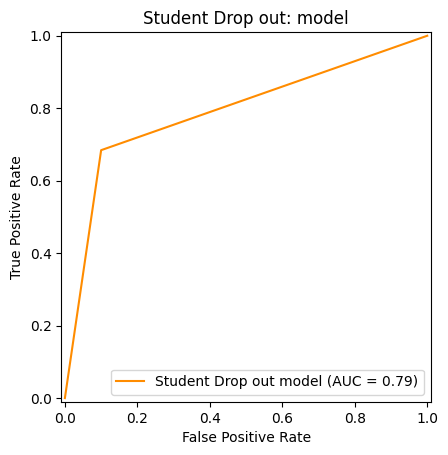

In [22]:
model_2, feature_importance_2 = hpo2.cross_validation_hpo(
    x=x2, y=y2,
    search_space=search_space, 
    folds=5,
    algo='lr'
    )

In [23]:
feature_importance_2

,variable,coefficient
6,M07_2_N,0.181460
10,M11_2_N,0.104400
9,M10_2_N,0.086970
8,M09_2_N,0.084140
3,M04_2_N,0.076050
1,M02_2_N,0.073870
7,M08_2_N,0.061050
4,M05_2_N,0.052810
2,M03_2_N,0.049690
0,M01_2_N,0.026490


#### Shap analysis

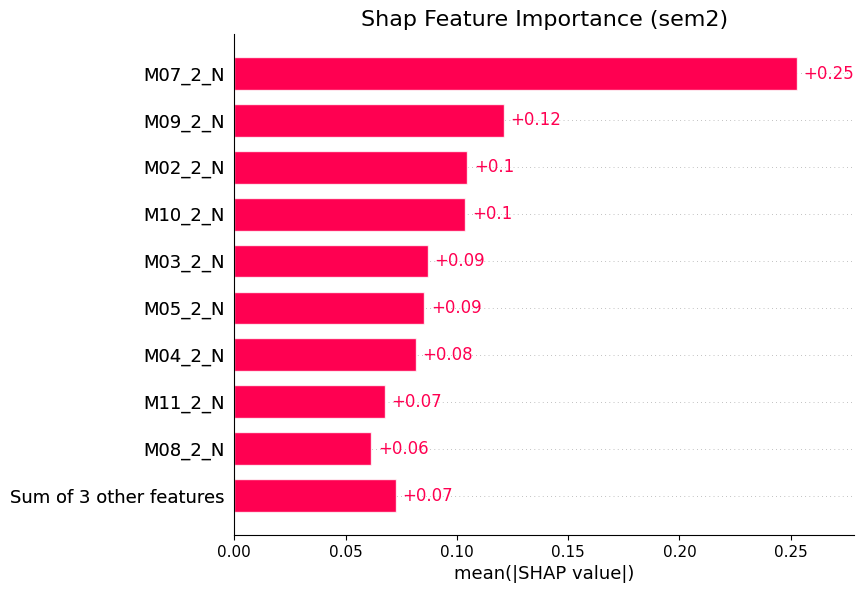

In [24]:
## Shap Global explainations
import shap
explainer2 = shap.Explainer(model_2['model'], model_2['x_train'])
shap_values2 = explainer2(model_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2)

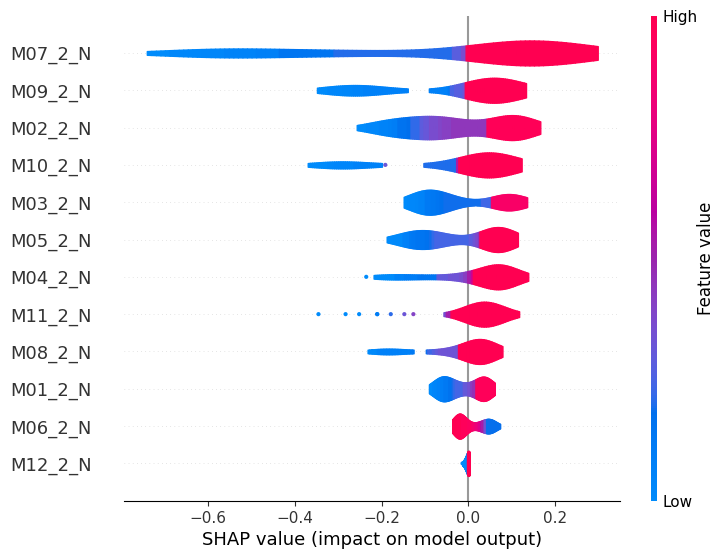

In [25]:
shap.plots.violin(shap_values2, show=True)

In [84]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2, link='logit')

In [85]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=20, model_name='lr')

Student index 20 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.318, Probability [1]: 0.682


In [86]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=5, model_name='lr')

Student index 5 grades:
         grades
M01_2_N     4.0
M02_2_N     2.7
M03_2_N     2.3
M04_2_N     4.0
M05_2_N     2.3
M06_2_N     3.3
M07_2_N     2.7
M08_2_N     1.7
M09_2_N     1.3
M10_2_N     3.7
M11_2_N     3.0
M12_2_N     5.1
Status: 0, Prediction: [0], Probability [0]: 0.648, Probability [1]: 0.352


In [87]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=6, model_name='lr')

Student index 6 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     1.3
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.357, Probability [1]: 0.643


In [88]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=10, model_name='lr')

Student index 10 grades:
         grades
M01_2_N     5.1
M02_2_N     3.0
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     1.3
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.347, Probability [1]: 0.653


## BHT semester 3

In [112]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(BHT_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
# Count occurrences of each unique value in the 'status' column
hpo3 = ModelTrainer(random_state=75)
x3, y3 = hpo3.split_data(BHT_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 134 | 0: 48


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 58.90trial/s, best loss: -0.7170995670995671]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            06               04
	 actual 1            02               25

Model parameters:
{'C': 0.009177231233302195, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Balanced acc.: 76.29630%
Validation accuracy.: 83.78378%
Sensitivity score (for 1): 92.59259%
Specificity score (for 0): 60.00000%
F1 score.: 89.28571%
False prediction: 16.21622%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 73.57trial/s, best loss: -0.6

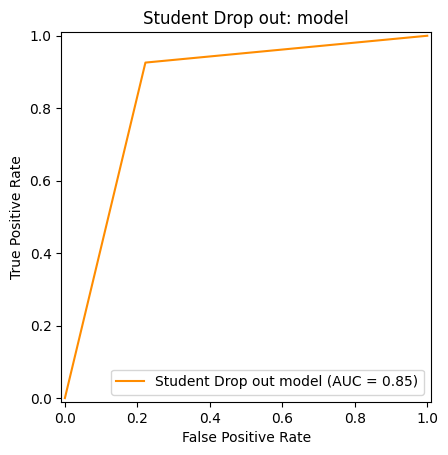

In [113]:
model_3, feature_importance_3 = hpo3.cross_validation_hpo(
    x=x3, y=y3,
    search_space=search_space, 
    folds=5,
    algo='lr'
    )

In [114]:
feature_importance_3

,variable,coefficient
9,M10_3_N,0.163420
1,M02_3_N,0.103150
7,M08_3_N,0.102060
8,M09_3_N,0.083460
13,M14_3_N,0.082790
0,M01_3_N,0.053990
14,M15_3_N,0.051830
12,M13_3_N,0.038200
10,M11_3_N,0.008570
3,M04_3_N,0.002600


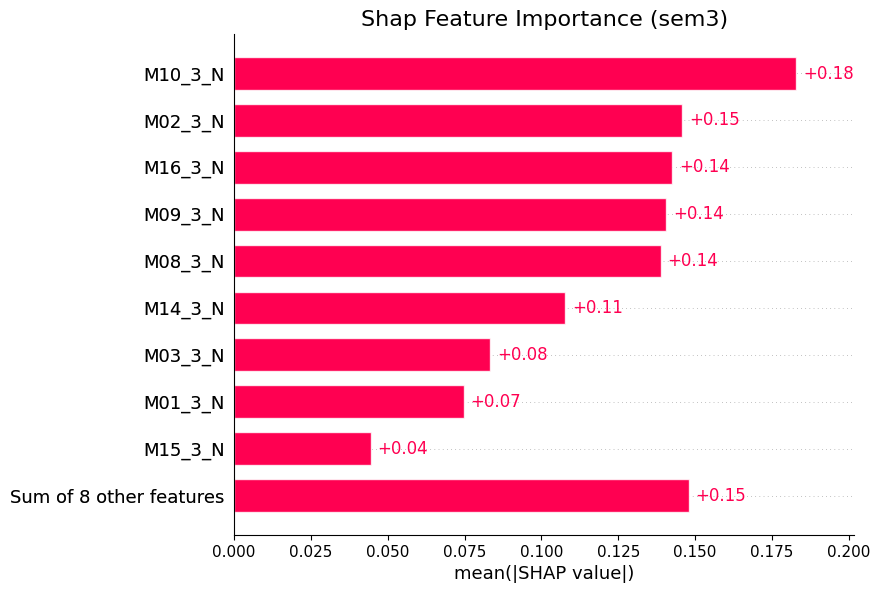

In [115]:
## Shap Global explainations
import shap
explainer3 = shap.Explainer(model_3['model'], model_3['x_train'])
shap_values3 = explainer3(model_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3)

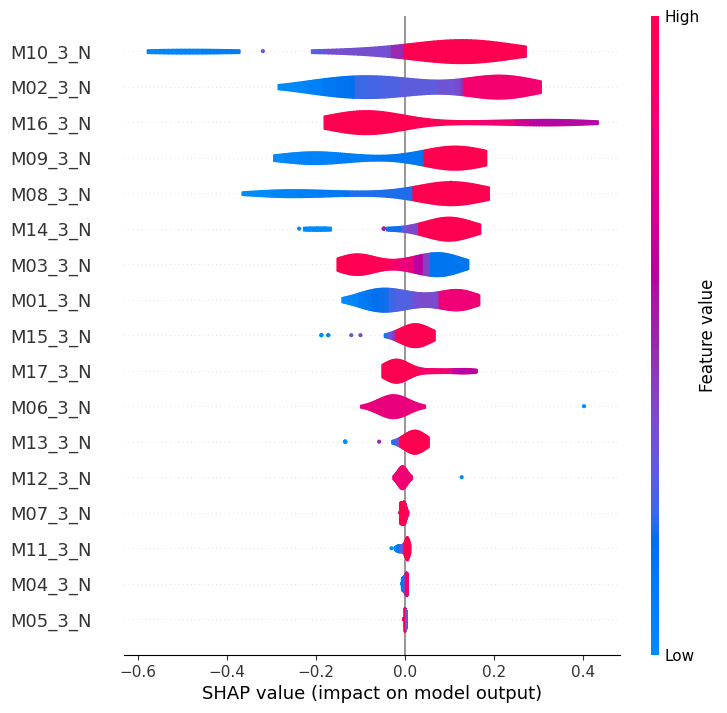

In [116]:
shap.plots.violin(shap_values3, show=True)

In [117]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3, link='logit')

In [118]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=1, model_name='lr')

Student index 1 grades:
         grades
M01_3_N     5.0
M02_3_N     1.7
M03_3_N     5.0
M04_3_N     5.1
M05_3_N     5.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.386, Probability [1]: 0.614


In [119]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=9, model_name='lr')

Student index 9 grades:
         grades
M01_3_N     1.0
M02_3_N     1.0
M03_3_N     1.3
M04_3_N     1.0
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     1.0
M10_3_N     1.0
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     1.0
M14_3_N     1.0
M15_3_N     1.0
M16_3_N     1.3
M17_3_N     1.0
Status: 0, Prediction: [0], Probability [0]: 0.684, Probability [1]: 0.316


In [120]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=3, model_name='lr')

Student index 3 grades:
         grades
M01_3_N     5.1
M02_3_N     5.1
M03_3_N     5.1
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.307, Probability [1]: 0.693


In [121]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=10, model_name='lr')

Student index 10 grades:
         grades
M01_3_N     3.0
M02_3_N     5.0
M03_3_N     1.7
M04_3_N     3.3
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.297, Probability [1]: 0.703
